# AI Tango

## Model Experiments - Gradient Boosting


In [3]:
from pose_parser.pose_parser.learning import model_builder as mb
from scipy.stats import randint

# Reloader
import importlib

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}
# Columns we know we'll always want to drop
drop_list = ["video_id"]
# Only keep these columns (including target)
column_whitelist = []


In [ ]:
# this one is the original "avg dataset used"
# data_file = "./data/annotated_videos/dataset_1678732901064497000.csv"

# this one includes more pooled stats (max)
# data_file = "./data/annotated_videos/dataset_1679002854718304000.csv"

# this one is 45 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679015606654767000.csv"

# this one is 25 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679016147487099000.csv"

# this one is a flat column representation frame by frame angles of a labeled 10 frame window
# data_file = "./data/annotated_videos/dataset_1679087888313443000.csv"

# this one is a flat column representation frame by frame angles of a labeled 25 frame window
# data_file = "./data/annotated_videos/dataset_1679103956737220000.csv"

# Dataset 1  
## 45 Frame Window, pooled Avg / STD / Max

### Test 1 - Random upsampled minority class 

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8645
Precision: 0.8784
Recall: 0.9774
F1 Score: 0.9253
ROC AUC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.88      0.98      0.93       133

    accuracy                           0.86       155
   macro avg       0.72      0.58      0.60       155
weighted avg       0.83      0.86      0.83       155



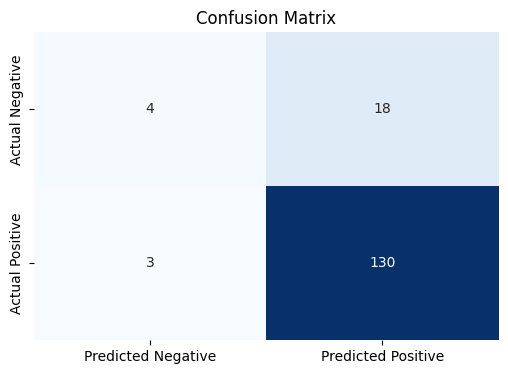

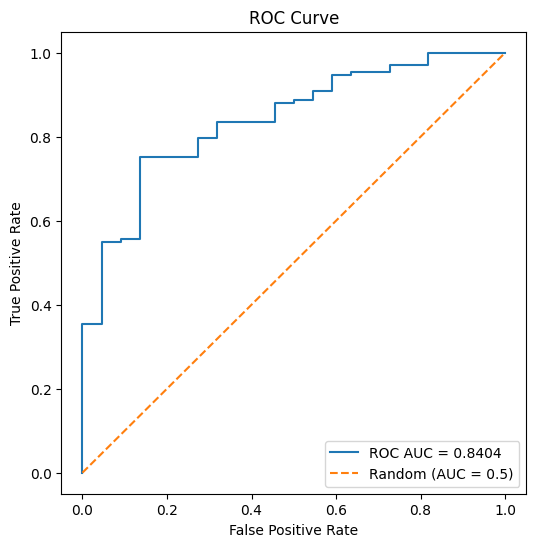

In [8]:
data_file = "./data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8645
Precision: 0.8784
Recall: 0.9774
F1 Score: 0.9253
ROC AUC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.88      0.98      0.93       133

    accuracy                           0.86       155
   macro avg       0.72      0.58      0.60       155
weighted avg       0.83      0.86      0.83       155



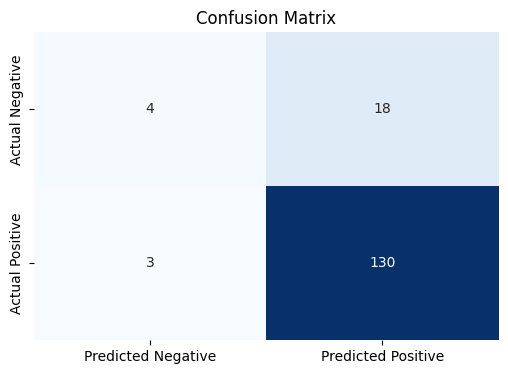

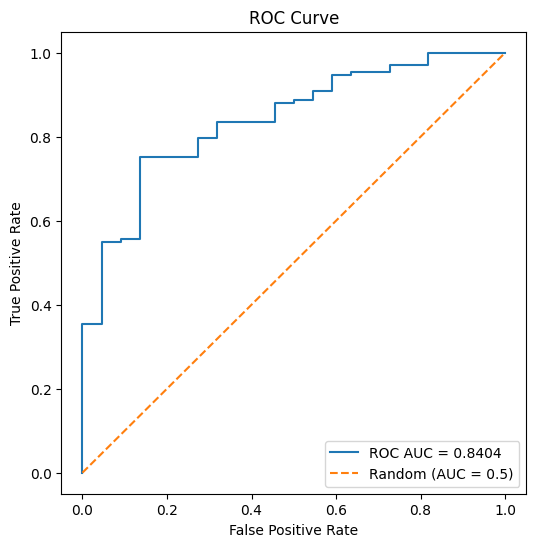

In [ ]:
data_file = "./data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=True,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()